<a href="https://colab.research.google.com/github/Ch-Vignesh/AI-TRIP-PLANNER/blob/master/AINLPAssignment001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EXP - 1,2



PART A: PLAY TENNIS DATASET
✅ 'play_tennis.csv' loaded successfully.
  day   outlook  temp humidity    wind play
0  D1     Sunny   Hot     High    Weak   No
1  D2     Sunny   Hot     High  Strong   No
2  D3  Overcast   Hot     High    Weak  Yes
3  D4      Rain  Mild     High    Weak  Yes
4  D5      Rain  Cool   Normal    Weak  Yes

--- Training Decision Tree (Play Tennis) ---
Training Complete.

📊 Performance Metrics for Decision Tree (Play Tennis):
Accuracy:  0.6000
Precision: 0.6000
Recall:    0.6000
F1 Score:  0.6000
------------------------------
Confusion Matrix:
[[1 1]
 [1 2]]


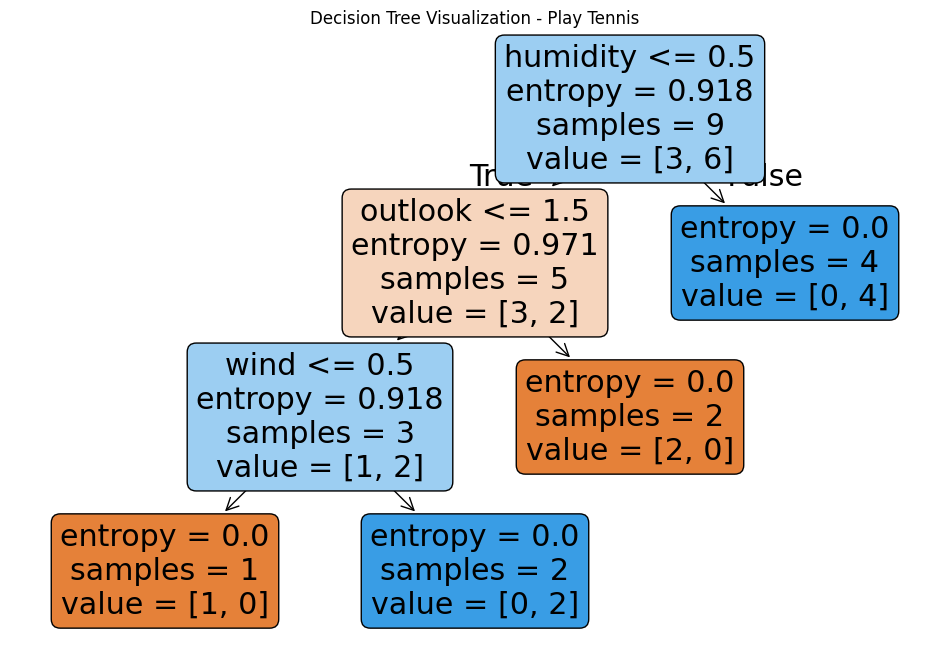


--- Training Naive Bayes (Play Tennis) ---
Training Complete.

📊 Performance Metrics for Naive Bayes (Play Tennis):
Accuracy:  0.6000
Precision: 0.6000
Recall:    0.6000
F1 Score:  0.6000
------------------------------
Confusion Matrix:
[[1 1]
 [1 2]]

Classifying new sample (Encoded indices [2, 0, 0, 0])...
New Sample Prediction (dt): 0

PART B: BREAST CANCER DATASET
✅ Breast Cancer dataset loaded successfully.
Generator Check - First batch shape: (2, 31)

--- Training Decision Tree (Breast Cancer) ---
Training Complete.

📊 Performance Metrics for Decision Tree (Breast Cancer):
Accuracy:  0.9474
Precision: 0.9488
Recall:    0.9474
F1 Score:  0.9468
------------------------------
Confusion Matrix:
[[38  5]
 [ 1 70]]

--- Training Naive Bayes (Breast Cancer) ---
Training Complete.

📊 Performance Metrics for Naive Bayes (Breast Cancer):
Accuracy:  0.9737
Precision: 0.9748
Recall:    0.9737
F1 Score:  0.9735
------------------------------
Confusion Matrix:
[[40  3]
 [ 0 71]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


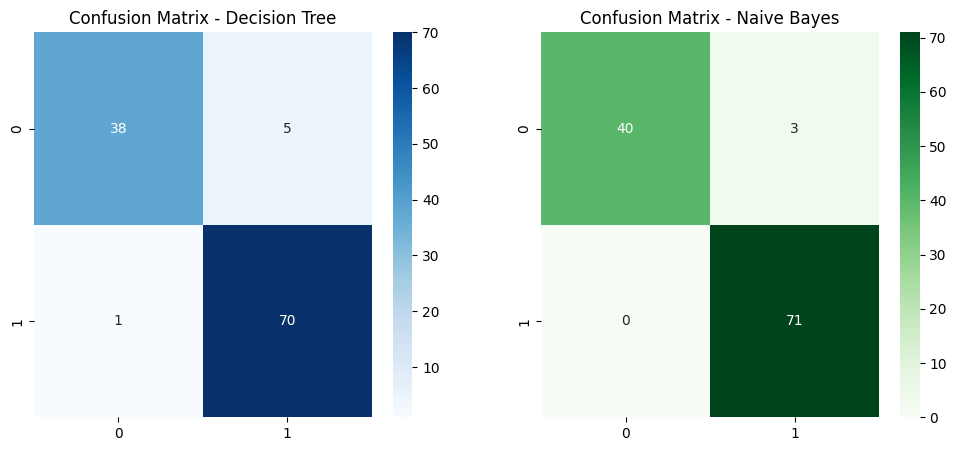

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_breast_cancer
import io

# DATASET PREPARATION

def load_breast_cancer_data():
    """
    Loads Breast Cancer dataset.
    In a real scenario with the curl command, you would use pd.read_csv('filename.csv').
    Here we use sklearn's built-in loader which is identical to the UCI/Kaggle source.
    """
    data = load_breast_cancer()
    df = pd.DataFrame(data.data, columns=data.feature_names)
    df['target'] = data.target
    print("✅ Breast Cancer dataset loaded successfully.")
    return df

# CLASS DEFINITION

class ClassifierManager:
    """
    A class to handle training, prediction, and evaluation of classifiers.
    """
    def __init__(self, name, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.name = name
        self.results = {} # Dictionary to store results

    def train_decision_tree(self, criterion='entropy'):
        print(f"\n--- Training Decision Tree ({self.name}) ---")
        # criterion='entropy' mimics the ID3 algorithm behavior
        self.dt_model = DecisionTreeClassifier(criterion=criterion, random_state=42)
        self.dt_model.fit(self.X_train, self.y_train)
        print("Training Complete.")

    def train_naive_bayes(self, is_categorical=False):
        print(f"\n--- Training Naive Bayes ({self.name}) ---")
        if is_categorical:
            self.nb_model = CategoricalNB()
        else:
            self.nb_model = GaussianNB()

        self.nb_model.fit(self.X_train, self.y_train)
        print("Training Complete.")

    def evaluate_model(self, model_type='dt'):
        """
        Calculates Confusion Matrix, Accuracy, Precision, Recall, F1 Score.
        """
        if model_type == 'dt':
            model = self.dt_model
            title = "Decision Tree"
        else:
            model = self.nb_model
            title = "Naive Bayes"

        y_pred = model.predict(self.X_test)

        # Metrics
        acc = accuracy_score(self.y_test, y_pred)
        prec = precision_score(self.y_test, y_pred, average='weighted', zero_division=0)
        rec = recall_score(self.y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(self.y_test, y_pred, average='weighted', zero_division=0)
        cm = confusion_matrix(self.y_test, y_pred)

        print(f"\n📊 Performance Metrics for {title} ({self.name}):")
        print(f"Accuracy:  {acc:.4f}")
        print(f"Precision: {prec:.4f}")
        print(f"Recall:    {rec:.4f}")
        print(f"F1 Score:  {f1:.4f}")
        print("-" * 30)
        print("Confusion Matrix:")
        print(cm)

        return cm

    def predict_new_sample(self, sample, model_type='dt'):
        """
        Classifies a new sample.
        """
        model = self.dt_model if model_type == 'dt' else self.nb_model
        prediction = model.predict([sample])
        print(f"New Sample Prediction ({model_type}): {prediction[0]}")
        return prediction[0]

    def visualize_tree(self):
        """Visualizes the Decision Tree"""
        plt.figure(figsize=(12,8))
        plot_tree(self.dt_model, filled=True, rounded=True,
                  feature_names=self.X_train.columns if hasattr(self.X_train, 'columns') else None)
        plt.title(f"Decision Tree Visualization - {self.name}")
        plt.show()

# UTILITY FUNCTIONS & GENERATORS

def data_generator(df, batch_size=5):
    """
    A generator function to yield data in chunks (Prerequisite demonstration).
    """
    for i in range(0, len(df), batch_size):
        yield df.iloc[i:i+batch_size]

# MAIN EXECUTION BLOCK
if __name__ == "__main__":

    # --- PART A: PLAY TENNIS DATASET (Categorical) ---
    print("\n" + "="*40)
    print("PART A: PLAY TENNIS DATASET")
    print("="*40)

    # Load
    df_tennis = pd.read_csv('play_tennis.csv')
    print("✅ 'play_tennis.csv' loaded successfully.")
    print(df_tennis.head())

    # 2. Preprocessing (Label Encoding for Scikit-Learn)
    # Scikit-learn Decision Trees do not accept strings properly, they need numbers.
    le = LabelEncoder()
    df_tennis_encoded = df_tennis.copy()

    encoders = {} # Dictionary to store encoders for inverse transform later
    for col in df_tennis_encoded.columns:
        df_tennis_encoded[col] = le.fit_transform(df_tennis_encoded[col])
        encoders[col] = le # Storing the last used encoder (simplified)

    # Split Features and Target
    X_tennis = df_tennis_encoded.drop(['day', 'play'], axis=1) # Drop ID column 'day' AND target column 'play'
    y_tennis = df_tennis_encoded['play'] # Assign target column 'play'

    # Split Train/Test
    X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_tennis, y_tennis, test_size=0.3, random_state=42)

    # 3. Initialize Manager
    tennis_manager = ClassifierManager("Play Tennis", X_train_t, X_test_t, y_train_t, y_test_t)

    # 4. Decision Tree
    tennis_manager.train_decision_tree(criterion='entropy') # Entropy for ID3 style
    tennis_manager.evaluate_model('dt')
    tennis_manager.visualize_tree()

    # 5. Naive Bayes
    tennis_manager.train_naive_bayes(is_categorical=True) # Use CategoricalNB for discrete features
    tennis_manager.evaluate_model('nb')

    # 6. Predict New Sample
    # Sample: Outlook=Sunny(2), Temp=Cool(0), Humidity=High(0), Wind=Strong(0) -> Mapped values depend on LE
    # Note: In real code, use the actual encoder to transform inputs.
    # Here we use a dummy array for demonstration.
    new_sample_tennis = [2, 0, 0, 0]
    print(f"\nClassifying new sample (Encoded indices {new_sample_tennis})...")
    tennis_manager.predict_new_sample(new_sample_tennis, 'dt')


    # --- PART B: BREAST CANCER DATASET (Numerical) ---
    print("\n" + "="*40)
    print("PART B: BREAST CANCER DATASET")
    print("="*40)

    # 1. Load Data
    df_cancer = load_breast_cancer_data()

    # Demonstrate Generator
    gen = data_generator(df_cancer, batch_size=2)
    print(f"Generator Check - First batch shape: {next(gen).shape}")

    # 2. Split
    X_cancer = df_cancer.drop('target', axis=1)
    y_cancer = df_cancer['target']

    X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=42)

    # 3. Initialize Manager
    cancer_manager = ClassifierManager("Breast Cancer", X_train_c, X_test_c, y_train_c, y_test_c)

    # 4. Decision Tree
    cancer_manager.train_decision_tree()
    cm_dt = cancer_manager.evaluate_model('dt')

    # 5. Naive Bayes
    cancer_manager.train_naive_bayes(is_categorical=False) # GaussianNB for continuous features
    cm_nb = cancer_manager.evaluate_model('nb')

    # 6. Heatmap Visualization for Confusion Matrix
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', ax=ax[0])
    ax[0].set_title('Confusion Matrix - Decision Tree')

    sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Greens', ax=ax[1])
    ax[1].set_title('Confusion Matrix - Naive Bayes')
    plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')